# 기본 환경

In [1]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# 랜덤 시드 고정
SEED=20
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  

# 데이터 준비

In [2]:
# CIFAR10 이미지 데이터셋
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 피처 스케일링
X_train = X_train / 255.
X_test = X_test / 255.

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

170508288/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


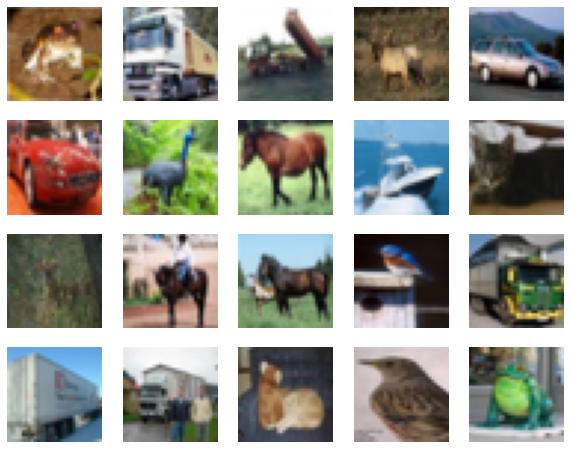

In [3]:
# Train 이미지 출력하기
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1), 
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

# CNN 모델

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

In [5]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', input_shape=[32, 32, 3]), 
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),    
    Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),

    # GlobalAveragePooling2D(),
    Flatten(),

    Dense(units=64, activation='relu'),
    Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [6]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10,
                    validation_split=0.2, verbose=2) 

Epoch 1/10
625/625 - 14s - loss: 1.6728 - accuracy: 0.3873 - val_loss: 1.5256 - val_accuracy: 0.4396 - 14s/epoch - 22ms/step
Epoch 2/10
625/625 - 2s - loss: 1.3179 - accuracy: 0.5246 - val_loss: 1.2593 - val_accuracy: 0.5401 - 2s/epoch - 4ms/step
Epoch 3/10
625/625 - 3s - loss: 1.1639 - accuracy: 0.5864 - val_loss: 1.1257 - val_accuracy: 0.6055 - 3s/epoch - 4ms/step
Epoch 4/10
625/625 - 2s - loss: 1.0572 - accuracy: 0.6284 - val_loss: 1.1311 - val_accuracy: 0.6043 - 2s/epoch - 4ms/step
Epoch 5/10
625/625 - 2s - loss: 0.9802 - accuracy: 0.6553 - val_loss: 1.0351 - val_accuracy: 0.6479 - 2s/epoch - 4ms/step
Epoch 6/10
625/625 - 2s - loss: 0.9116 - accuracy: 0.6801 - val_loss: 1.0048 - val_accuracy: 0.6511 - 2s/epoch - 4ms/step
Epoch 7/10
625/625 - 2s - loss: 0.8528 - accuracy: 0.7034 - val_loss: 0.9263 - val_accuracy: 0.6857 - 2s/epoch - 4ms/step
Epoch 8/10
625/625 - 2s - loss: 0.8027 - accuracy: 0.7186 - val_loss: 0.9070 - val_accuracy: 0.6955 - 2s/epoch - 4ms/step
Epoch 9/10
625/625 - 

In [8]:
def build_cnn():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), 
                     activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

    return model

model = build_cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

In [9]:
# 모델 학습
history = model.fit(X_train, y_train, batch_size=256, epochs=50,
                    validation_data=(X_test, y_test), verbose=2) 

Epoch 1/50
196/196 - 3s - loss: 2.1927 - accuracy: 0.1934 - val_loss: 3.1666 - val_accuracy: 0.1241 - 3s/epoch - 17ms/step
Epoch 2/50
196/196 - 2s - loss: 1.9442 - accuracy: 0.2919 - val_loss: 1.9876 - val_accuracy: 0.2947 - 2s/epoch - 10ms/step
Epoch 3/50
196/196 - 2s - loss: 1.7704 - accuracy: 0.3605 - val_loss: 1.7006 - val_accuracy: 0.4221 - 2s/epoch - 11ms/step
Epoch 4/50
196/196 - 2s - loss: 1.6508 - accuracy: 0.4110 - val_loss: 1.5088 - val_accuracy: 0.4832 - 2s/epoch - 11ms/step
Epoch 5/50
196/196 - 2s - loss: 1.5557 - accuracy: 0.4474 - val_loss: 1.4080 - val_accuracy: 0.5103 - 2s/epoch - 11ms/step
Epoch 6/50
196/196 - 2s - loss: 1.5027 - accuracy: 0.4665 - val_loss: 1.3145 - val_accuracy: 0.5574 - 2s/epoch - 11ms/step
Epoch 7/50
196/196 - 2s - loss: 1.4344 - accuracy: 0.4949 - val_loss: 1.2333 - val_accuracy: 0.5786 - 2s/epoch - 10ms/step
Epoch 8/50
196/196 - 2s - loss: 1.3811 - accuracy: 0.5145 - val_loss: 1.1611 - val_accuracy: 0.6068 - 2s/epoch - 10ms/step
Epoch 9/50
196/1

In [10]:
# history (로그 시각화)

def plot_loss_accuracy(history, epochs: int):

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].plot(range(1, epochs+1), 
            history.history['loss'][0:epochs], 
            label='train')
    axes[0].plot(range(1, epochs+1), 
            history.history['val_loss'][0:epochs], 
            label='valid')
    axes[0].set_xlabel('epochs')
    axes[0].set_ylabel('mse')
    axes[0].legend()

    axes[1].plot(range(1, epochs+1), 
            history.history['accuracy'][0:epochs], 
            label='train')
    axes[1].plot(range(1, epochs+1), 
            history.history['val_accuracy'][0:epochs], 
            label='valid')
    axes[1].set_xlabel('epochs')
    axes[1].set_ylabel('accuracy')
    axes[1].legend()

    plt.show()

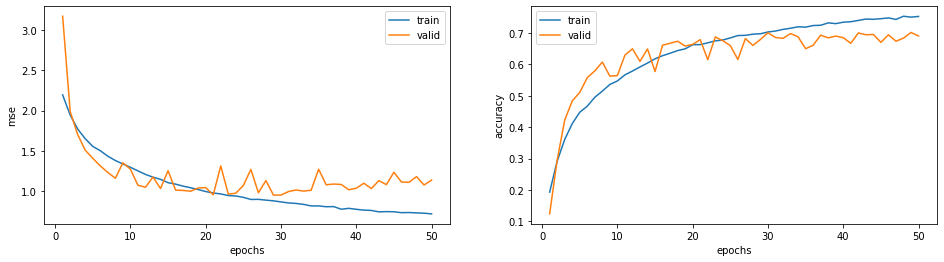

In [11]:
plot_loss_accuracy(history, 50)

# Transfer Learning (전이 학습)

In [18]:
# Pre-trained 모델 가져오기 
from tensorflow.keras.applications import VGG16
cnn_base = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))  
cnn_base.trainable = False

In [19]:
# Transfer 모델 생성
def build_transfer(cnn_base):
    transfer_model = Sequential()
    transfer_model.add(cnn_base) 
    transfer_model.add(GlobalAveragePooling2D()) 

    transfer_model.add(Dense(units=256, activation='relu'))
    transfer_model.add(Dropout(rate=0.5))
    transfer_model.add(Dense(units=10, activation='softmax'))

    transfer_model.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])

    return transfer_model

In [20]:
transfer_model = build_transfer(cnn_base)
transfer_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
____________________________________

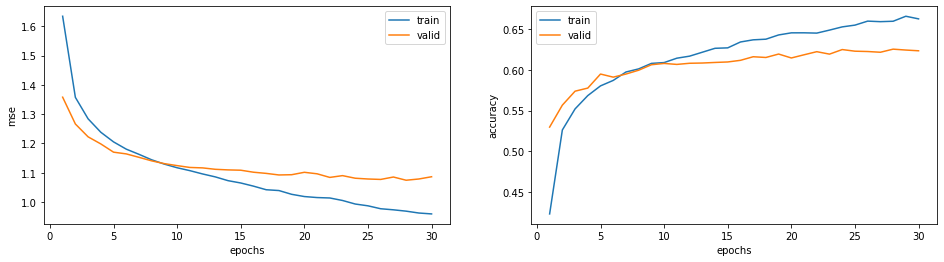

In [21]:
history = transfer_model.fit(X_train, y_train, batch_size=256, epochs=30,
                    validation_data=(X_test, y_test), verbose=0) 

plot_loss_accuracy(history, 30)

# Fine Tuning 


In [26]:
transfer_model.layers[0].trainable = True

In [27]:
transfer_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
__________________________________________

Epoch 1/30
196/196 - 7s - loss: 0.9546 - accuracy: 0.6655 - val_loss: 1.0729 - val_accuracy: 0.6293 - 7s/epoch - 37ms/step
Epoch 2/30
196/196 - 7s - loss: 0.9462 - accuracy: 0.6663 - val_loss: 1.0851 - val_accuracy: 0.6241 - 7s/epoch - 36ms/step
Epoch 3/30
196/196 - 7s - loss: 0.9400 - accuracy: 0.6721 - val_loss: 1.0775 - val_accuracy: 0.6306 - 7s/epoch - 36ms/step
Epoch 4/30
196/196 - 7s - loss: 0.9355 - accuracy: 0.6716 - val_loss: 1.0777 - val_accuracy: 0.6266 - 7s/epoch - 37ms/step
Epoch 5/30
196/196 - 7s - loss: 0.9283 - accuracy: 0.6748 - val_loss: 1.0755 - val_accuracy: 0.6288 - 7s/epoch - 37ms/step
Epoch 6/30
196/196 - 7s - loss: 0.9256 - accuracy: 0.6762 - val_loss: 1.0765 - val_accuracy: 0.6262 - 7s/epoch - 37ms/step
Epoch 7/30
196/196 - 7s - loss: 0.9196 - accuracy: 0.6756 - val_loss: 1.0829 - val_accuracy: 0.6286 - 7s/epoch - 37ms/step
Epoch 8/30
196/196 - 7s - loss: 0.9147 - accuracy: 0.6793 - val_loss: 1.0793 - val_accuracy: 0.6290 - 7s/epoch - 36ms/step
Epoch 9/30
196/1

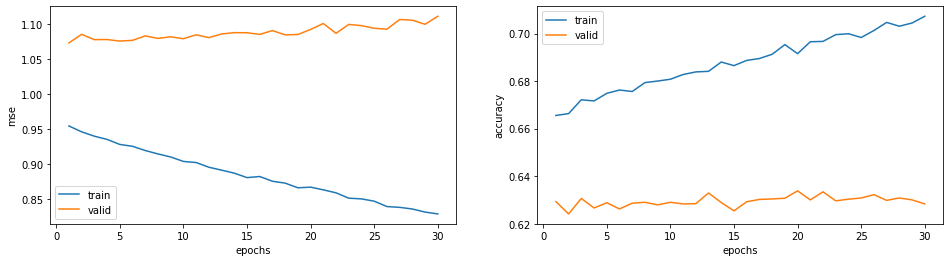

In [28]:
history = transfer_model.fit(X_train, y_train, batch_size=256, epochs=30,
                    validation_data=(X_test, y_test), verbose=2) 

plot_loss_accuracy(history, 30)

# 데이터 증강

In [39]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
    ]
)

In [40]:
new_model = data_augmentation = tf.keras.Sequential(
    [
        data_augmentation,
        cnn_base,
        GlobalAveragePooling2D(),
        Dense(units=10, activation='softmax')
    ]
)

In [41]:
new_model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

Epoch 1/30
196/196 - 20s - loss: 2.2571 - accuracy: 0.1349 - val_loss: 2.0475 - val_accuracy: 0.1888 - 20s/epoch - 103ms/step
Epoch 2/30
196/196 - 19s - loss: 1.9090 - accuracy: 0.2498 - val_loss: 1.6909 - val_accuracy: 0.3336 - 19s/epoch - 95ms/step
Epoch 3/30
196/196 - 19s - loss: 1.5301 - accuracy: 0.4122 - val_loss: 1.3239 - val_accuracy: 0.4835 - 19s/epoch - 96ms/step
Epoch 4/30
196/196 - 18s - loss: 1.3125 - accuracy: 0.4962 - val_loss: 1.2325 - val_accuracy: 0.5383 - 18s/epoch - 94ms/step
Epoch 5/30
196/196 - 18s - loss: 1.1892 - accuracy: 0.5536 - val_loss: 1.1837 - val_accuracy: 0.5556 - 18s/epoch - 94ms/step
Epoch 6/30
196/196 - 18s - loss: 1.0982 - accuracy: 0.6058 - val_loss: 1.0305 - val_accuracy: 0.6384 - 18s/epoch - 94ms/step
Epoch 7/30
196/196 - 19s - loss: 0.9941 - accuracy: 0.6485 - val_loss: 0.9201 - val_accuracy: 0.6807 - 19s/epoch - 95ms/step
Epoch 8/30
196/196 - 19s - loss: 0.9258 - accuracy: 0.6769 - val_loss: 0.9057 - val_accuracy: 0.6884 - 19s/epoch - 95ms/step

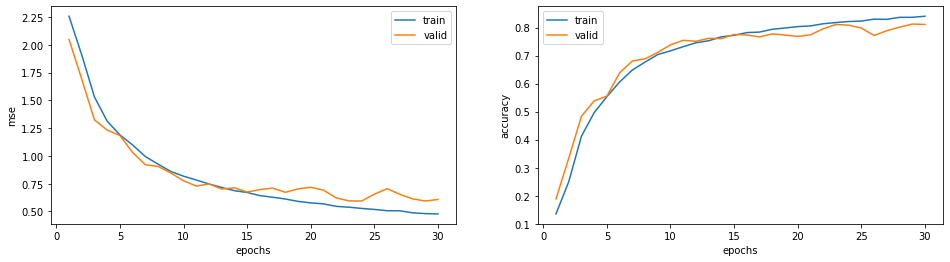

In [42]:
history = new_model.fit(X_train, y_train, batch_size=256, epochs=30,
                    validation_data=(X_test, y_test), verbose=2) 

plot_loss_accuracy(history, 30)